In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as scp
import numpy.linalg as nplin
from scipy.integrate import solve_bvp

In [67]:
# Cálculo de los autovalores por el método de Numerov

# Arreglo de puntos sobre el eje x en donde se calcula la solución. Discretización del espacio.
xarray = np.linspace(0,10,500)
N = len(xarray)
L = xarray[len(xarray)-1]- xarray[0] 
l = 1/(N-1)

# Constantes
h = 1.054571628*10**(-34) 
m = 1.6726219*10**(-27)
gamma2 = (2*m*L**2)/h**2

# Potencial
V_0 = (xarray)**2          # Evaluar la función en el arreglo xarray#################################

# Método Numerov
A = np.eye(N,N,1) + np.eye(N,N,-1) - 2*np.eye(N,N)
V = V_0*np.eye(N,N)
B = np.linalg.inv((1/12)*(np.eye(N,N,1) + np.eye(N,N,-1) + 10*np.eye(N,N)))
W = -1/(gamma2*l**2)*np.matmul(B,A) + V

# Se considera la condición de frontera en la función de onda en el infinito
W[:,0] = 0
W[:,N-1] = 0

# Matríz a resolver autovalores
np.set_printoptions(precision = 4)
print("\nMatríz a resolver autovalores:\n\n", W)

# Arreglo de autovalores
eigval = np.sort(nplin.eig(W)[0]) 
print('\n\n Autovalores de menor a mayor:\n\n ',eigval)


# Considerando solamente los 4 positivos más pequeños
eigval4 = []

for i in range(0,len(eigval)):
    
    eigval4.append(eigval[2*i])
        
    if len(eigval4) == 4:
        eigval4 = np.array(eigval4)
        break

print("\n\nLos cuatro primeros autovalores son:\n\n", eigval4)


Matríz a resolver autovalores:

 [[ 0.0000e+00 -1.2165e-38  1.2289e-39 ...  0.0000e+00  0.0000e+00
   0.0000e+00]
 [ 0.0000e+00  4.0160e-04 -1.2289e-38 ...  0.0000e+00  0.0000e+00
   0.0000e+00]
 [ 0.0000e+00 -1.2289e-38  1.6064e-03 ...  0.0000e+00  0.0000e+00
   0.0000e+00]
 ...
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  9.9200e+01 -1.2289e-38
   0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ... -1.2289e-38  9.9600e+01
   0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  1.2289e-39 -1.2165e-38
   0.0000e+00]]


 Autovalores de menor a mayor:

  [0.0000e+00 0.0000e+00 4.0160e-04 1.6064e-03 3.6144e-03 6.4257e-03
 1.0040e-02 1.4458e-02 1.9679e-02 2.5703e-02 3.2530e-02 4.0160e-02
 4.8594e-02 5.7831e-02 6.7871e-02 7.8715e-02 9.0361e-02 1.0281e-01
 1.1606e-01 1.3012e-01 1.4498e-01 1.6064e-01 1.7711e-01 1.9438e-01
 2.1245e-01 2.3132e-01 2.5100e-01 2.7148e-01 2.9277e-01 3.1486e-01
 3.3775e-01 3.6144e-01 3.8594e-01 4.1124e-01 4.3735e-01 4.6426e-01
 4.9197e-01 5.2048e-01 5.4980e-01 5.

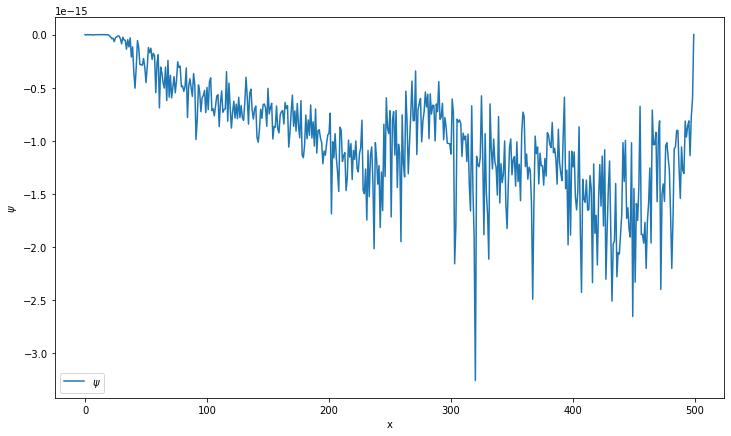

In [69]:
eigvec = np.sort(nplin.eig(W)[1]) 
#print(eigvec[:,1])


#x_plot = xarray
psi_plot = eigvec[:,30]
#print(psi_plot)
#print(x_plot)

fig = plt.figure(figsize = (12,7))    

plt.plot(psi_plot,label='$\psi$')
#plt.plot(x_plot, x_plot**2,label='x²')

plt.legend()
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.show()
